# Lab 3: Animal pursuit kinematics

In this lab you will be working with real animal pursuit data collected from videos of experiments conducted by Prof. Alberto Soto and/or colleagues Matt McHenry,  Ashley Peterson, Jacob Johansen and James Liao. There are three data sets: zebrafish, bluefish, and lionfish. The data include the position of a predator and a prey through time and are denoted by the following variables: 

`t, xPred, yPred, xPrey, yPrey` 

The lionfish and zebrafish data also contain another variable `headPred` for the heading angle of the predator (in radians), which we will use as groundtruth values. 

## Lab 3 Tasks 
In this lab you will:
  * Select 2 sequences from each data set (6 total sequences) 
  * Determine the frame rate and total duration of the sequence
  * Plot the predator and prey trajectories on the same figure, use different colors and a legend to identify each animal's trajectory
  * Compute and plot the following derived kinematic variables 
    * Speed of predator and prey, 
$u_{\text{pred}}$ and $u_{\text{prey}}$
    * Heading of predator,
$\theta$
    * Rotational velocity of predator, 
$\dot \theta$
    * Distance between predator and prey,
$d$
    * Line-of-sight angle,
$\lambda$
    * Deviation angle,
$\delta$
    
  * Qualitatively describe each sequence based on the kinematics
    * Example: Bluefish sequence 3 is a long distance chase with one successful evasion maneuver quickly followed by a reorienting turn by the predator and then capture. 


## Lab 3 Assignment

You will turn in a PDF of this comeplete notebook on Gradescope, it should contain all of the items described above (see the solution for generating a nicely formatted PDF at the bottom of this notebook). Your Google Colab file should reside within the google drive folder that I created and shared with you individually. 

## Notes and Tips
You can use any methods you choose to accomplish the lab tasks. Most calculations can be done with NumPy methods. Pandas is a great library to use for loading data and storing derived variables. Plotly creates very nice visualizations and is designed to work with dataframes.  

Angles should be computed in radians, but plotted in degrees. To convert an angle from radians to degrees multiply by $\frac{180}{\pi}$.

**Help each other out, talk to your peers. Check in with other groups. I know ya'll like to stay in your chosen seats, but take this opportunity to share ideas with others.** 

### Zebrafish
The data come from lab experiments with zebrafish (*Danio rerio*). The pursuit trials were conducted in shallow petri dishes or small circular fish tanks and recorded with a high-speed video camera. 

These fish move intermittently, in a burst-and-coast style. You'll see this most clearly in the speed and heading for the predator. In general, the prey only move when the the predator is very close. This means that the prey speed could be zero for portions of the sequence. 

The position data may be in units of `cm`, it's fine to plot in these units or you can convert to `m`. 


---


### Bluefish
An interdisciplinary team of researchers from UC Irvine, University of Florida, and University of Maryland recorded and analyzed video of bluefish (*Pomatomus saltatrix*) as they pursued mummichog (*Fundulus heteroclitus*). These experiments were performed in a cylindrical (ø = 6.5 m, depth = 0.8 m) outdoor tank.

The data was collected manually by clicking on the position of the prey and predator for each video frame. So the raw data will inherently be noisy.
You can apply the Savitzky–Golay filter to smooth the data, but take care not to *over* smooth. See the example below for how to apply the smoothing algorithm. 

Position data are given in pixels, use the following conversion factor to convert to meters before computing other variables: 

`unit_conversion = 0.25/73.8588  # meters/pixels` 

**Please read:** Most of the bluefish sequences contain `NaN` values for the predator and/or prey. Which you will want to drop for easier processing. If you import the bluefish data into a pandas dataframe you can drop the `NaN` values with:

```
df_blue = pd.read_csv("/bluefish_seq_1.csv")
df_blue = df_blue.dropna()
df_blue.reset_index(drop=True)
```

---


### Lionfish
These are long interactions with slow moving red lionfish (*Pterois volitans*) hunting green chromis (*Chromis viridis*). The experiments were conducted inside a shallow 4-foot diameter tank. I am not certain that the predator is always following the prey, therefore some of the angles ($\lambda$ and $\delta$, in particular) may look very different than the other datasets.  

I do not know what units these data are in, but my best guess is that they are in meters, `m`.

## Importing the data
First, download your sequences. 

Upload to session storage by clicking on the folder icon on the left of this notebook (brings up the Files menu) and click on the leftmost icon (page with up arrow), see figure below for reference. 

To create a Pandas DataFrame from a CSV file we can use:

`df_1 = pd.read_csv("/zf_seq_1.csv")` 

Note that the path may be different, depending on which session folder the data were uploaded to, but you can find the file's pathname by left-clicking on the file name in the Files menu and copying the path. 

### Files menu
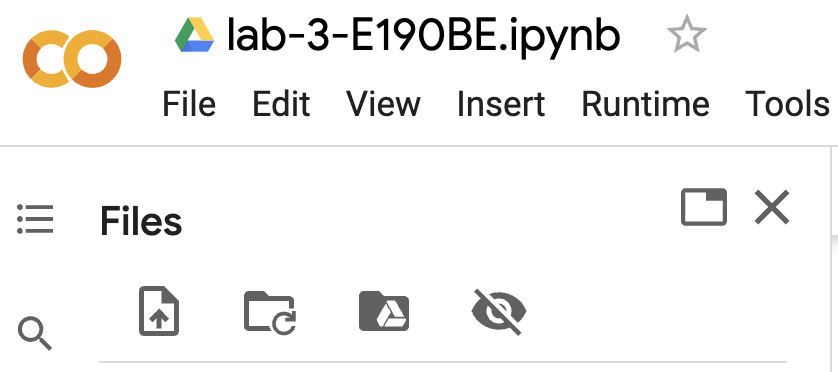

# Calculations and Plots of Animal Pursuit

## Load the Dependencies

In [ ]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

# Scipy signal for smoothing noisy data
from scipy import signal

# Plotly for interactive plots
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Zebrafish sequences

## Bluefish sequences

## Lionfish sequences

# Plotting with Plotly, Data Smoothing, and PDF Conversion

## Plotly Express plotting example

In [ ]:
# Read data
zf_1 = pd.read_csv("/zf_seq_1.csv")

# Plot predator heading (headPred) vs. time (t)
fig_1 = px.scatter(zf_1, x="t", y="headPred", 
                      title="Zebrafish Seq1, Predator Heading")
fig_1.show()

## Savitzky-Golay Filter example
The following example is from a [Plotly tutorial on smoothing](https://plotly.com/python/smoothing/) 

It's also a nice example of how to use [Plotly Graph Objects](https://plotly.com/python/graph-objects/) to make figures, which is more involved than using Plotly Express, but provides more functionality. 

Given some noisy data `y`, we generate the filtered data with
`y_hat = signal.savgol_filter(y, win_size, order)`,
where `win_size` is the window size used for filtering and `order` is the polynomial order used to fit subsets of the data. Low-order polynomials are most commonly used.  

In [ ]:
np.random.seed(1)

x = np.linspace(0, 10, 100)
y = np.sin(x)
noise = 2 * np.random.random(len(x)) - 1 # uniformly distributed between -1 and 1
y_noise = y + noise

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(size=2, color='black'),
    name='Sine'
))

fig.add_trace(go.Scatter(
    x=x,
    y=y_noise,
    mode='markers',
    marker=dict(
        size=6,
        color='royalblue',
        symbol='circle-open'
    ),
    name='Noisy Sine'
))

fig.add_trace(go.Scatter(
    x=x,
    y=signal.savgol_filter(y,
                           53, # window size used for filtering
                           3), # order of fitted polynomial
    mode='markers',
    marker=dict(
        size=6,
        color='mediumpurple',
        symbol='triangle-up'
    ),
    name='Savitzky-Golay'
))


fig.show()

## Method to convert notebook to nicely formatted PDF


1.   Download your Google Colab Notebook as `.ipynb`
2.   Upload the file to session storage using the Files menu
3.   Copy the file path and paste into the line of code below
4.   An html file will be generated and will show up in the Files menu
5.   Download the HTML file, then open and save as a PDF

I found this solution [on YouTube](https://youtu.be/-Ti9Mm21uVc)



In [ ]:
# Command to convert .ipynb to HTML
!jupyter nbconvert --to html /content/lab_3_E190BE_cp.ipynb

[NbConvertApp] Converting notebook /content/lab_3_E190BE_cp.ipynb to html
[NbConvertApp] Writing 340944 bytes to /content/lab_3_E190BE_cp.html
